In [70]:
#import main packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

In [7]:
#import main csv files
data = pd.read_csv('fraudTrain.csv')

In [8]:
data.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0


In [10]:
data.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
1002099,1002099,2/15/2020 16:40,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0
1002100,1002100,2/15/2020 16:40,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0
1002101,1002101,2/15/2020 16:42,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0
1002102,1002102,2/15/2020 16:42,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0
1002103,1002103,2/15/2020 16:43,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN


In [ ]:
# feature engineering

In [14]:
# converting Time to dateTime class object
data['Time'] = pd.to_datetime(data['Time'])

In [15]:
print(data['Time'].head())
print(data['Time'].tail())

0   2019-01-01 00:00:00
1   2019-01-01 00:00:00
2   2019-01-01 00:00:00
3   2019-01-01 00:01:00
4   2019-01-01 00:03:00
Name: Time, dtype: datetime64[ns]
1002099   2020-02-15 16:40:00
1002100   2020-02-15 16:40:00
1002101   2020-02-15 16:42:00
1002102   2020-02-15 16:42:00
1002103   2020-02-15 16:43:00
Name: Time, dtype: datetime64[ns]


In [16]:
print(data['Time'].describe())

count                          1002104
mean     2019-08-04 22:56:49.627184128
min                2019-01-01 00:00:00
25%                2019-05-05 11:43:00
50%                2019-08-05 16:02:30
75%                2019-11-17 17:16:00
max                2020-02-15 16:43:00
Name: Time, dtype: object


In [17]:
# adding mont and day and year to the dataset

data['Day'] = data['Time'].dt.day
data['Month'] = data['Time'].dt.month
data['Year'] = data['Time'].dt.year


In [18]:
data.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,1,1,2019
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,1,1,2019
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,1,1,2019
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,1,1,2019
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,1,1,2019


In [19]:
data.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year
1002099,1002099,2020-02-15 16:40:00,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0,15,2,2020
1002100,1002100,2020-02-15 16:40:00,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0,15,2,2020
1002101,1002101,2020-02-15 16:42:00,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0,15,2,2020
1002102,1002102,2020-02-15 16:42:00,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0,15,2,2020
1002103,1002103,2020-02-15 16:43:00,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN,15,2,2020


In [20]:
# adding hour and minute to the dataset
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute

In [21]:
data.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,1,1,2019,0,0
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,1,1,2019,0,0
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,1,1,2019,0,0
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,1,1,2019,0,1
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,1,1,2019,0,3


In [22]:
data.tail()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
1002099,1002099,2020-02-15 16:40:00,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0,15,2,2020,16,40
1002100,1002100,2020-02-15 16:40:00,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0,15,2,2020,16,40
1002101,1002101,2020-02-15 16:42:00,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0,15,2,2020,16,42
1002102,1002102,2020-02-15 16:42:00,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0,15,2,2020,16,42
1002103,1002103,2020-02-15 16:43:00,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN,15,2,2020,16,43


In [26]:
# no need for the time column, it has been substituted with day, month, year and time
data = data.drop(['Time'], axis=1)

In [27]:
data.head()

,ID,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
0,0,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,1,1,2019,0,0
1,1,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,1,1,2019,0,0
2,2,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,1,1,2019,0,0
3,3,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,1,1,2019,0,1
4,4,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,1,1,2019,0,3


In [29]:
#the number of unique value 
print(data['is_fraud'].nunique())

print(data['is_fraud'].unique())

2
[ 0.  1. nan]


In [ ]:
# data cleansing

In [30]:
print(pd.value_counts(data['is_fraud']))

is_fraud
0.0    996390
1.0      5713
Name: count, dtype: int64


In [31]:
data.shape

(1002104, 14)

In [32]:
#count the number of nulls
print(data.isnull().sum())

ID             0
Card Number    0
merchant       0
category       0
Amount         1
firstName      1
lastName       1
trans_num      1
is_fraud       1
Day            0
Month          0
Year           0
Hour           0
Minute         0
dtype: int64


In [58]:
# dropping nan raws
data.dropna(inplace = True)

In [59]:
data.shape

(1002103, 14)

In [60]:
#count the number of nulls
print(data.isnull().sum())

ID             0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
Day            0
Month          0
Year           0
Hour           0
Minute         0
dtype: int64


In [ ]:
#Histogram of columns

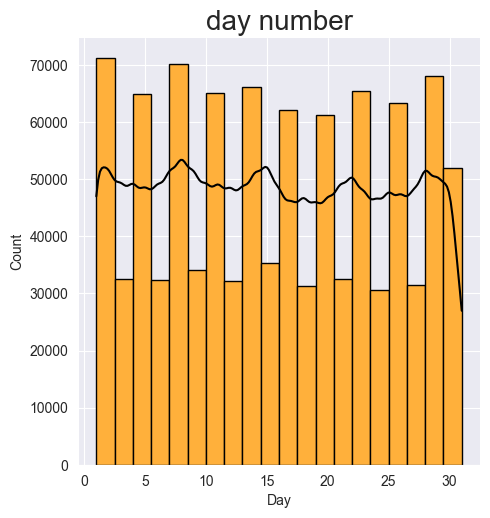

In [61]:
sns.displot(x=data['Day'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("day number",size=20)
plt.show()

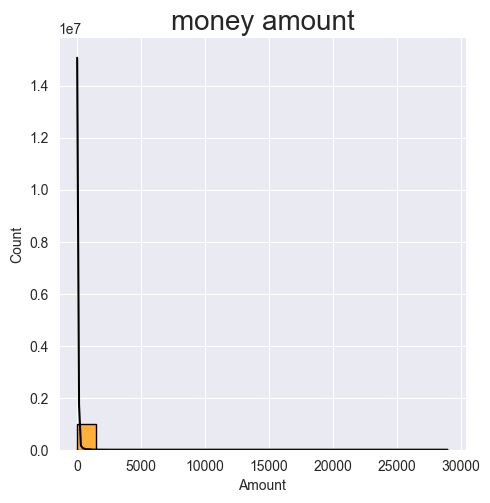

In [56]:
sns.displot(x=data['Amount'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("money amount",size=20)
plt.show()

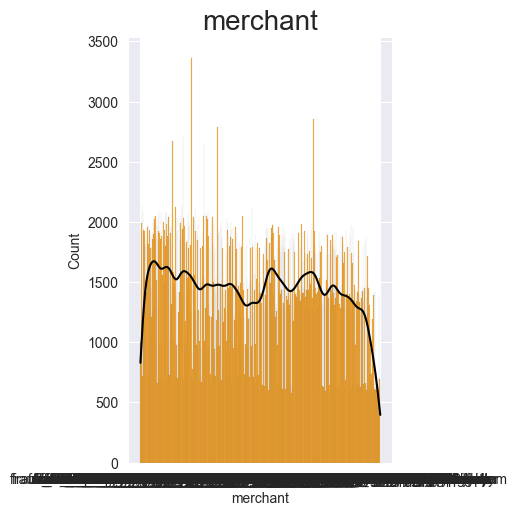

In [64]:
sns.displot(x=data['merchant'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("merchant",size=20)
plt.show()

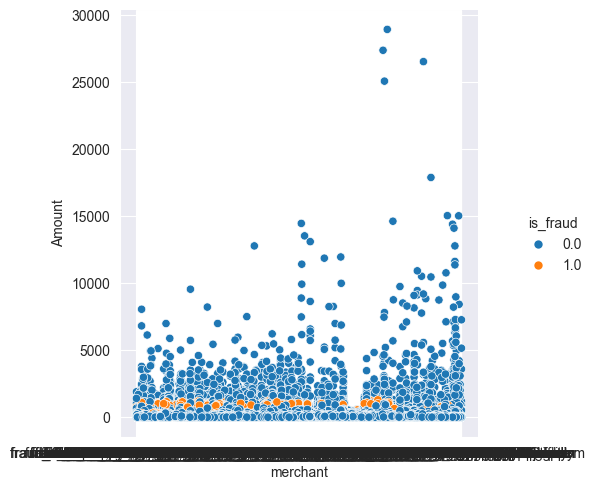

In [65]:
sns.relplot(x='merchant',y='Amount',data=data,kind='scatter',hue='is_fraud',height=5)
plt.show()

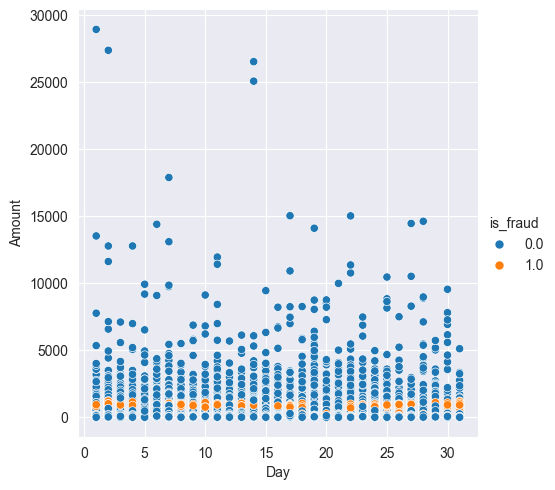

In [66]:
sns.relplot(x='Day',y='Amount',data=data,kind='scatter',hue='is_fraud',height=5)
plt.show()

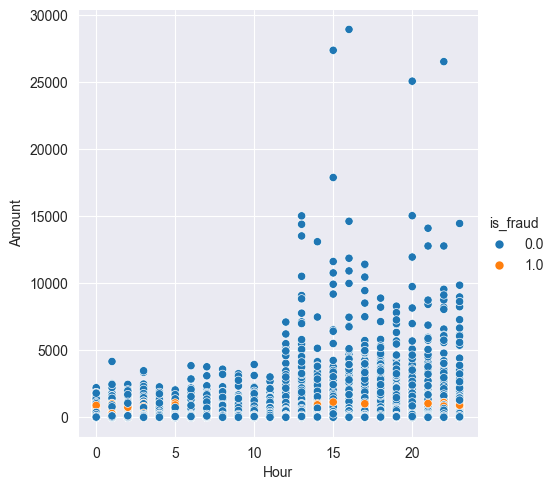

In [68]:
sns.relplot(x='Hour',y='Amount',data=data,kind='scatter',hue='is_fraud',height=5)
plt.show()

In [69]:
#print all datatypes of objects
data.select_dtypes(include=['object']).columns

Index(['merchant', 'category', 'firstName', 'lastName', 'trans_num'], dtype='object')

In [71]:
#Encoding object columns
label_encoding=preprocessing.LabelEncoder()
cols=['merchant', 'category', 'firstName', 'lastName', 'trans_num']
for i in cols:
    data[i]=label_encoding.fit_transform(data[i])

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ID           1002103 non-null  int64  
 1   Card Number  1002103 non-null  float64
 2   merchant     1002103 non-null  int32  
 3   category     1002103 non-null  int32  
 4   Amount       1002103 non-null  float64
 5   firstName    1002103 non-null  int32  
 6   lastName     1002103 non-null  int32  
 7   trans_num    1002103 non-null  int32  
 8   is_fraud     1002103 non-null  float64
 9   Day          1002103 non-null  int32  
 10  Month        1002103 non-null  int32  
 11  Year         1002103 non-null  int32  
 12  Hour         1002103 non-null  int32  
 13  Minute       1002103 non-null  int32  
dtypes: float64(3), int32(10), int64(1)
memory usage: 76.5 MB


In [76]:
data.head()

,ID,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Day,Month,Year,Hour,Minute
0,0,2.700000e+15,514,8,4.97,160,18,43723,0.0,1,1,2019,0,0
1,1,6.300000e+11,241,4,107.23,305,156,123180,0.0,1,1,2019,0,0
2,2,3.890000e+13,390,0,220.11,113,379,632681,0.0,1,1,2019,0,0
3,3,3.530000e+15,360,2,45.00,161,460,420764,0.0,1,1,2019,0,1
4,4,3.760000e+14,297,9,41.96,331,148,642198,0.0,1,1,2019,0,3


In [77]:
# check if any data is duplicated
data.duplicated().sum()

0

In [79]:
#check outlires
cols = data.columns
for i in cols:
    q1 = np.percentile(data[i], 25)
    q3 = np.percentile(data[i], 75)
    norm_range = (q3 - q1) * 1.5

    lower_outliers = data[data[i] < (q1 - norm_range)] # lower ouliers
    upper_outliers = data[data[i] > (q3 + norm_range)] # upper outliers

    
    outliers = len(lower_outliers) + len(upper_outliers) #total number of outliers

    print(f"number of outliers in column {i} is {outliers}")

    # Replace outliers 
    data[i] = np.where(data[i] < (q1 - norm_range), q1 - norm_range, data[i])
    data[i] = np.where(data[i] > (q3 + norm_range), q3 + norm_range, data[i])

number of outliers in column ID is 0
number of outliers in column Card Number is 0
number of outliers in column merchant is 0
number of outliers in column category is 0
number of outliers in column Amount is 0
number of outliers in column firstName is 0
number of outliers in column lastName is 0
number of outliers in column trans_num is 0
number of outliers in column is_fraud is 0
number of outliers in column Day is 0
number of outliers in column Month is 0
number of outliers in column Year is 0
number of outliers in column Hour is 0
number of outliers in column Minute is 0


In [81]:
# rechecking for outliers
for i in cols:
    q1 = np.percentile(data[i], 25)
    q3 = np.percentile(data[i], 75)
    norm_range = (q3 - q1) * 1.5

    lower_outliers = data[data[i] < (q1 - norm_range)]

    upper_outliers = data[data[i] > (q3 + norm_range)]

    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

The number of outliers in ID: 0
The number of outliers in Card Number: 0
The number of outliers in merchant: 0
The number of outliers in category: 0
The number of outliers in Amount: 0
The number of outliers in firstName: 0
The number of outliers in lastName: 0
The number of outliers in trans_num: 0
The number of outliers in is_fraud: 0
The number of outliers in Day: 0
The number of outliers in Month: 0
The number of outliers in Year: 0
The number of outliers in Hour: 0
The number of outliers in Minute: 0


<Axes: >

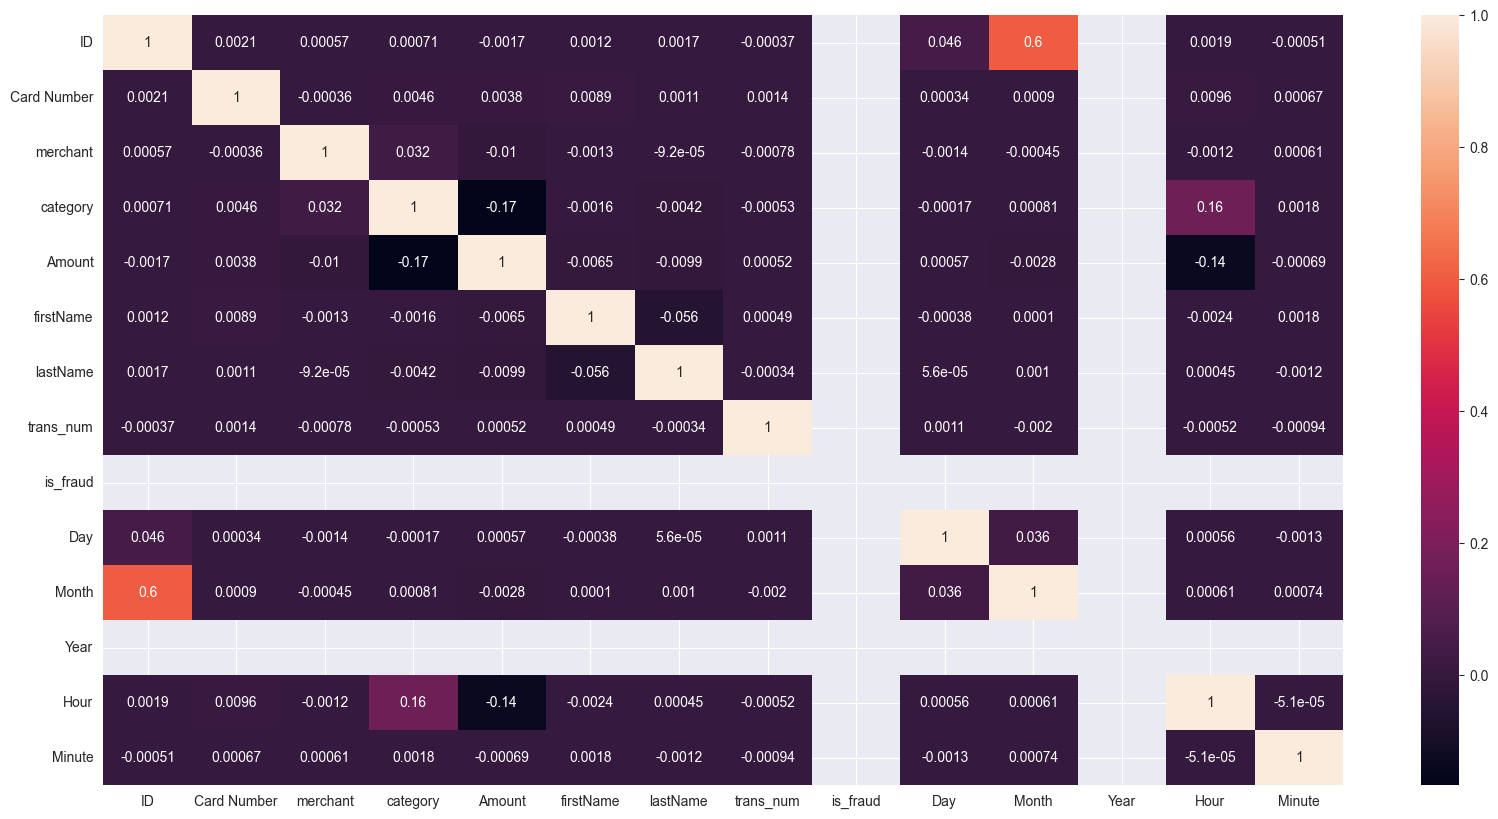

In [87]:
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(),annot = True)